<a href="https://colab.research.google.com/github/JScottLopez/github-ds/blob/master/TIM_6500_JSLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing Conditions Related to COVID-19 Deaths

By: Joseph S. Lopez

TIM-6500 v3: Princples of Data Science

August 1, 2021

In [113]:
#import necessary Python libraries
import pandas as pd

#loaded data from file into pandas dataframe
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [58]:
#used describe function for data exploration
#df.describe(include = 'all')

In [59]:
#determine data types for each column
#df.dtypes

#count null values for all columns
#df.isnull().sum(axis = 0)

In [114]:
#rename columns for later use
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths'}, inplace=True)
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,AgeGroup,CV19_Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [115]:
#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)
df.dropna(subset = ["Year"], inplace=True)
df.dropna(subset = ["Month"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,AgeGroup,CV19_Deaths,Number of Mentions,Flag
37262,07/18/2021,03/01/2020,03/31/2020,By Month,"2,020",3,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,9,9,NaN
37263,07/18/2021,04/01/2020,04/30/2020,By Month,"2,020",4,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,27,30,NaN
37264,07/18/2021,05/01/2020,05/31/2020,By Month,"2,020",5,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,20,20,NaN
37265,07/18/2021,06/01/2020,06/30/2020,By Month,"2,020",6,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,18,18,NaN
37266,07/18/2021,07/01/2020,07/31/2020,By Month,"2,020",7,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,38,39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273234,07/18/2021,02/01/2021,02/28/2021,By Month,"2,021",2,Puerto Rico,COVID-19,COVID-19,U071,All Ages,132,132,NaN
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN


In [116]:
#drop non-relevant columns
df.drop(['Data As Of', 'Start Date', 'End Date', 'Number of Mentions', 'ICD10_codes', 'Flag'], axis=1, inplace=True)

#remove all non-relevant values from State column
df = df[~df.State.str.contains('District of Columbia|New York City|Puerto Rico|United States', regex=True)]
#remove all non-relevant values from AgeGroup column
df = df[~df.AgeGroup.str.contains('Not stated|All Ages', regex=True)]
#remove all non-relevant values from Group column
df = df[~df.Group.str.contains('By Year|By Total', regex=True)]

#drop non-relevant rows
row_index = df[df['Condition'] == 'All other conditions and causes (residual)'].index
df.drop(row_index, inplace = True)

display(df)

,Group,Year,Month,State,Condition Group,Condition,AgeGroup,CV19_Deaths
41680,By Month,"2,021",1,Alabama,Respiratory diseases,Influenza and pneumonia,35-44,18
41692,By Month,"2,020",6,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,11
41693,By Month,"2,020",7,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,10
41694,By Month,"2,020",8,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,17
41697,By Month,"2,020",11,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,14
...,...,...,...,...,...,...,...,...
268822,By Month,"2,020",10,Wyoming,COVID-19,COVID-19,85+,30
268823,By Month,"2,020",11,Wyoming,COVID-19,COVID-19,85+,56
268824,By Month,"2,020",12,Wyoming,COVID-19,COVID-19,85+,55
268825,By Month,"2,021",1,Wyoming,COVID-19,COVID-19,85+,33


In [117]:
#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')
df['Year']=df['Year'].str.replace(',','')

#convert remaining values to type float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')
df['Year'] = df['Year'].astype(int, errors = 'raise')
df['Month'] = df['Month'].astype(int, errors = 'raise')

display(df)

,Group,Year,Month,State,Condition Group,Condition,AgeGroup,CV19_Deaths
41680,By Month,2021,1,Alabama,Respiratory diseases,Influenza and pneumonia,35-44,18
41692,By Month,2020,6,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,11
41693,By Month,2020,7,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,10
41694,By Month,2020,8,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,17
41697,By Month,2020,11,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,14
...,...,...,...,...,...,...,...,...
268822,By Month,2020,10,Wyoming,COVID-19,COVID-19,85+,30
268823,By Month,2020,11,Wyoming,COVID-19,COVID-19,85+,56
268824,By Month,2020,12,Wyoming,COVID-19,COVID-19,85+,55
268825,By Month,2021,1,Wyoming,COVID-19,COVID-19,85+,33


In [110]:
table = df.pivot_table(index='Condition', columns='AgeGroup', values='CV19_Deaths', aggfunc=np.sum, fill_value = 0)
display(table)

AgeGroup,0-24,25-34,35-44,45-54,55-64,65-74,75-84,85+
Condition,,,,,,,,
Adult respiratory distress syndrome,0,108,635,3286,9703,15236,12364,6766
Alzheimer disease,0,0,0,0,0,391,4533,12077
COVID-19,292,2533,8727,27534,70868,125538,155497,169843
Cardiac arrest,0,142,680,3096,8709,14710,15808,14914
Cardiac arrhythmia,0,0,0,200,1879,6500,12231,15879
Cerebrovascular diseases,0,0,0,272,1810,4872,7034,7971
Chronic lower respiratory diseases,0,0,39,299,3595,11139,15776,13024
Diabetes,0,89,938,4308,13312,23950,23926,15874
Heart failure,0,0,33,230,1975,6342,11645,17562


In [111]:
import numpy as np

table = df.pivot_table(index='Condition', columns='State', values='CV19_Deaths', aggfunc=np.sum, fill_value = 0)
display(table)

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Condition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adult respiratory distress syndrome,390,0,2390,616,5956,1211,280,10,2980,1292,0,95,612,842,280,183,477,1974,0,716,970,994,734,833,677,0,88,2388,0,3402,173,3504,828,42,2009,259,105,1967,230,809,86,837,4862,299,0,690,626,181,201,0
Alzheimer disease,168,0,372,215,2696,366,174,45,792,472,0,46,587,621,331,103,207,168,11,131,314,507,631,147,458,12,58,23,11,403,60,463,443,92,968,341,135,957,72,158,136,320,1711,78,0,192,328,50,428,0
COVID-19,10825,178,15946,6043,65426,6961,8161,1546,35494,17929,292,2034,22450,13583,6014,4878,7537,9625,833,10283,13499,18477,7617,7580,11279,1504,2783,5715,1216,24529,4041,25296,13970,1508,22986,8500,2596,28441,2565,9142,1837,13219,55829,2360,116,11090,5598,2802,8180,519
Cardiac arrest,1422,0,1666,498,18613,163,902,0,2732,2403,0,0,533,658,225,296,329,389,0,207,1610,903,76,685,371,0,98,1161,12,5090,136,5983,1113,21,1896,354,0,1880,108,584,18,779,3622,14,0,189,221,54,45,0
Cardiac arrhythmia,507,0,816,283,4625,492,387,27,2493,740,0,71,1679,1211,412,223,698,397,10,901,744,938,821,345,631,69,247,146,53,1552,34,1377,807,69,1426,651,145,2437,94,839,105,863,4403,65,0,584,355,107,786,24
Cerebrovascular diseases,265,0,384,123,3164,305,204,22,1716,633,0,51,787,638,201,126,265,335,0,608,384,728,466,247,437,10,89,61,18,900,22,769,540,34,1122,397,67,1398,34,384,58,567,2490,15,0,327,139,13,416,0
Chronic lower respiratory diseases,632,0,985,397,4170,669,650,0,4381,974,0,122,2753,1580,510,325,798,561,0,899,912,1402,918,592,741,176,238,228,72,1233,184,1630,998,123,1898,1054,148,2355,167,756,172,1048,3946,80,0,627,399,204,1124,41
Diabetes,960,0,2196,659,14561,901,706,93,6882,1990,0,162,5517,1935,744,425,1266,1344,0,1809,994,1894,1351,1233,921,202,331,576,58,2467,506,2271,1501,122,2467,2014,252,3225,170,1038,264,1614,11045,185,0,968,796,207,1565,10
Heart failure,522,0,682,327,4298,500,614,24,1812,1031,0,114,2110,1177,483,263,702,543,11,669,1067,1213,919,645,685,50,203,142,40,1277,52,1413,937,128,1738,687,183,2373,189,725,164,778,3955,125,0,672,443,149,953,0


In [118]:
pd.set_option('precision', 0)

df_single_level_cols = df.pivot_table(index=['Condition'],columns=['State','AgeGroup'], values='CV19_Deaths',fill_value = 0)
df_single_level_cols.stack()
display(df_single_level_cols)



State                                              Alabama        ... Wyoming    
AgeGroup                                             25-34 35-44  ...   75-84 85+
Condition                                                         ...            
Adult respiratory distress syndrome                      0     0  ...       0   0
Alzheimer disease                                        0     0  ...       0   0
COVID-19                                                10    19  ...      35  38
Cardiac arrest                                           0    14  ...       0   0
Cardiac arrhythmia                                       0     0  ...       0  12
Cerebrovascular diseases                                 0     0  ...       0   0
Chronic lower respiratory diseases                       0     0  ...      16  10
Diabetes                                                 0     0  ...       0  10
Heart failure                                            0     0  ...       0   0
Hypertensive diseases                                    0     0  ...      13  15
Influenza and pneumonia                                  0    18  ...      16  14
Intentional and unintentional injury, poisoning...       0     0  ...       0   0
Ischemic heart disease                                   0     0  ...       0  10
Malignant neoplasms                                      0     0  ...       0   0
Obesity                                                  0     0  ...       0   0
Other diseases of the circulatory system                 0     0  ...       0   0
Other diseases of the respiratory system                 0     0  ...       0   0
Renal failure                                            0     0  ...       0   0
Respiratory arrest                                       0     0  ...       0   0
Respiratory failure                                      0    25  ...      14  17
Sepsis                                                   0     0  ...       0   0
Vascular and unspecified dementia                        0     0  ...      10  17

[22 rows x 306 columns]

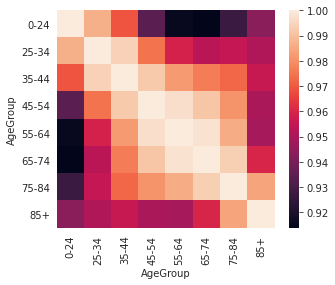

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
  pass
warnings.warn = ignore_warn

corrmat = table.corr()
f, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

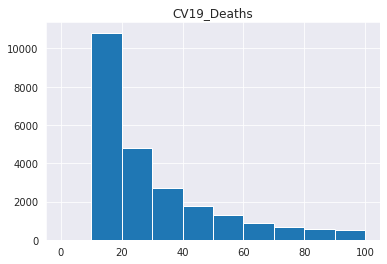

In [88]:
df.hist(column='CV19_Deaths', bins=[0,10,20,30,40,50,60,70,80,90,100]);